# Part A

**DOMAIN:** Botanical Research

**CONTEXT:** University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at various stages of growth. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a plant's species from a photo.

**DATA DESCRIPTION:** The dataset comprises of images from 12 plant species. 
Source: https://www.kaggle.com/c/plant-seedlings-classification/data.

**PROJECT OBJECTIVE:** To create a classifier capable of determining a plant's species from a photo. 

# Steps and tasks:

# 1. Import and Understand the data

# A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python.

**Hint: You can extract it Manually by losing 2 marks.**

In [1]:
# Import Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import tensorflow as tf
print(tf.__version__) 
import cv2
from glob import glob

2.4.0


In [57]:
# Import ZipFile module
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "plant-seedlings-classification.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall('unzipped')
    print('Done!')

File Name                                             Modified             Size
plant-seedlings-classification/                2021-10-08 11:16:30            0
plant-seedlings-classification/.DS_Store       2021-10-08 11:16:36         6148
__MACOSX/plant-seedlings-classification/._.DS_Store 2021-10-08 11:16:36          120
plant-seedlings-classification/train/          2021-10-05 16:09:24            0
plant-seedlings-classification/train/Cleavers/ 2021-10-05 16:09:26            0
plant-seedlings-classification/train/.DS_Store 2021-10-06 16:30:12        10244
__MACOSX/plant-seedlings-classification/train/._.DS_Store 2021-10-06 16:30:12          120
plant-seedlings-classification/train/Sugar beet/ 2021-10-05 15:12:52            0
plant-seedlings-classification/train/Common Chickweed/ 2021-10-05 15:12:46            0
plant-seedlings-classification/train/Loose Silky-bent/ 2021-10-05 15:12:48            0
plant-seedlings-classification/train/Scentless Mayweed/ 2021-10-05 15:12:50           

plant-seedlings-classification/train/Loose Silky-bent/5f6ba8739.png 2021-10-05 15:49:12      1758856
plant-seedlings-classification/train/Loose Silky-bent/3fb49152c.png 2021-10-05 15:49:12        28325
plant-seedlings-classification/train/Loose Silky-bent/2e69d1685.png 2021-10-05 15:49:12        35035
plant-seedlings-classification/train/Loose Silky-bent/13c51b503.png 2021-10-05 15:49:12       606908
plant-seedlings-classification/train/Loose Silky-bent/5cb45767e.png 2021-10-05 15:49:12       424377
plant-seedlings-classification/train/Loose Silky-bent/dee2a5307.png 2021-10-05 15:49:14       238261
plant-seedlings-classification/train/Loose Silky-bent/c629a95e2.png 2021-10-05 15:49:14        43646
plant-seedlings-classification/train/Loose Silky-bent/1b4404d36.png 2021-10-05 15:49:12        18145
plant-seedlings-classification/train/Loose Silky-bent/43645a24d.png 2021-10-05 15:49:12        29873
plant-seedlings-classification/train/Loose Silky-bent/efd3b6718.png 2021-10-05 15:49:14    

plant-seedlings-classification/train/Shepherds Purse/74fd5da5b.png 2021-10-05 15:49:16       302763
plant-seedlings-classification/train/Shepherds Purse/0ca928305.png 2021-10-05 15:49:16        31178
plant-seedlings-classification/train/Shepherds Purse/0bef4ae08.png 2021-10-05 15:49:16       480132
plant-seedlings-classification/train/Shepherds Purse/04fafa0d3.png 2021-10-05 15:49:16       198763
plant-seedlings-classification/train/Shepherds Purse/c819c3429.png 2021-10-05 15:49:16        24071
plant-seedlings-classification/train/Shepherds Purse/e41f1b997.png 2021-10-05 15:49:16      2456684
plant-seedlings-classification/train/Shepherds Purse/a4ae6ec8b.png 2021-10-05 15:49:16        16661
plant-seedlings-classification/train/Shepherds Purse/589fb760c.png 2021-10-05 15:49:16      1244830
plant-seedlings-classification/train/Shepherds Purse/fe2bf1883.png 2021-10-05 15:49:16        27070
plant-seedlings-classification/train/Shepherds Purse/7a9a62dac.png 2021-10-05 15:49:16       214413


plant-seedlings-classification/train/Common wheat/0975602f4.png 2021-10-05 15:49:10        18994
plant-seedlings-classification/train/Common wheat/7d87648c2.png 2021-10-05 15:49:10       877163
plant-seedlings-classification/train/Common wheat/c48b788a4.png 2021-10-05 15:49:10        21708
plant-seedlings-classification/train/Common wheat/d42042a90.png 2021-10-05 15:49:10        40925
plant-seedlings-classification/train/Common wheat/585041992.png 2021-10-05 15:49:10       291642
plant-seedlings-classification/train/Common wheat/9dde1db08.png 2021-10-05 15:49:10       698105
plant-seedlings-classification/train/Common wheat/b6454a013.png 2021-10-05 15:49:10        47623
plant-seedlings-classification/train/Black-grass/5a1295fb4.png 2021-10-05 15:49:08       167877
plant-seedlings-classification/train/Black-grass/d8afd58f3.png 2021-10-05 15:49:08      1112418
plant-seedlings-classification/train/Black-grass/418808d19.png 2021-10-05 15:49:08         8526
plant-seedlings-classification/tr

plant-seedlings-classification/train/Charlock/8705afe70.png 2021-10-05 15:49:08      2299401
plant-seedlings-classification/train/Charlock/1876d091f.png 2021-10-05 15:49:08       349086
plant-seedlings-classification/train/Charlock/0e1627696.png 2021-10-05 15:49:08       199749
plant-seedlings-classification/train/Charlock/523c4c9dd.png 2021-10-05 15:49:08        91913
plant-seedlings-classification/train/Charlock/1a92d7c2a.png 2021-10-05 15:49:08       400998
plant-seedlings-classification/train/Charlock/a30113dfc.png 2021-10-05 15:49:10       265917
plant-seedlings-classification/train/Charlock/3c75e7d79.png 2021-10-05 15:49:08      3149281
plant-seedlings-classification/train/Charlock/db96c0bab.png 2021-10-05 15:49:10        26250
plant-seedlings-classification/train/Charlock/fc3e15a2e.png 2021-10-05 15:49:10       166661
plant-seedlings-classification/train/Charlock/9c55fa55a.png 2021-10-05 15:49:10       187154
plant-seedlings-classification/train/Charlock/0c4a435c7.png 2021-10-05

Done!


## B. Map the images from train folder with train labels to form a DataFrame.

**Hint: Create a DataFrame with 3 columns: Name of image, Species/class/type of image & actual image..**

In [58]:
# There are 12 classes/categories and folders in the train folder
# Create list of folder names
folders = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']

# Number of folders determine number of classes/categories for classification
num_folders = len(folders)
num_folders

12

In [59]:
# Check number of images in each folder/category
data_dir = '/Users/rohan/Documents/AIML-CV Project/unzipped/plant-seedlings-classification/'
train_dir = os.path.join(data_dir, 'train')
for category in folders:
    print('{} {} images'.format(category, len(os.listdir(os.path.join(train_dir, category)))))

Black-grass 263 images
Charlock 390 images
Cleavers 287 images
Common Chickweed 611 images
Common wheat 221 images
Fat Hen 475 images
Loose Silky-bent 654 images
Maize 221 images
Scentless Mayweed 516 images
Shepherds Purse 231 images
Small-flowered Cranesbill 496 images
Sugar beet 385 images


In [60]:
# Create dataframe
train = []
for category_id, category in enumerate(folders):
    for file in os.listdir(os.path.join(train_dir, category)):
        train.append(['train/{}/{}'.format(category, file), category_id, category])
train = pd.DataFrame(train, columns=['Name of Image', 'Type of Image', 'Actual Image'])
train.head()

Name of Image  Type of Image Actual Image
0  train/Black-grass/5a1295fb4.png              0  Black-grass
1  train/Black-grass/d8afd58f3.png              0  Black-grass
2  train/Black-grass/418808d19.png              0  Black-grass
3  train/Black-grass/eac39cfa8.png              0  Black-grass
4  train/Black-grass/39e9bf4c7.png              0  Black-grass

In [61]:
# Check shape of dataframe
train.shape

(4750, 3)

## C. Write a function that will select n random images and display images along with its species.

**Hint: If input for function is 5, it should print 5 random images along with its labels.**

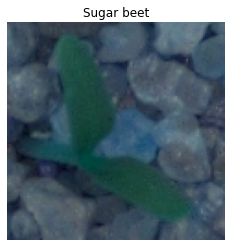

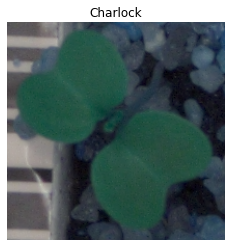

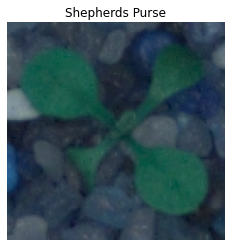

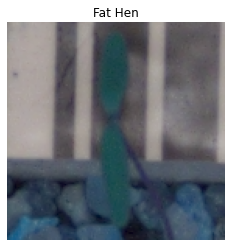

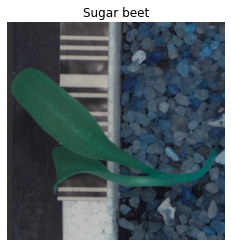

In [62]:
# Define Function
def PlotNRandomImages(N=5):
    temp = train.drop(['Type of Image'], axis=1)
    temp = temp.sample(N)
    temp = temp.values.tolist()
    
    for i, j in temp:
        plt.imshow(cv2.imread(data_dir+i));
        plt.title(j)
        plt.axis('off')
        plt.show()
    
# Call Function
PlotNRandomImages()

# 2. Data preprocessing

## A. Create X & Y from the DataFrame.

In [63]:
# Load Images
images_path = '/Users/rohan/Documents/AIML-CV Project/unzipped/plant-seedlings-classification/train/*/*.png'
images = glob(images_path)
train_images = []
train_labels = []

for img in images:
    train_images.append(cv2.imread(img))
    train_labels.append(img.split('/')[-2])
X = np.asarray(train_images)
Y = pd.DataFrame(train_labels)

X.shape, Y.shape

((4750,), (4750, 1))

## B. Encode labels of the images.

In [64]:
# Rename first column of Y
Y.rename(columns={0:'species'},inplace=True)

# Import Libraries
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# Create class instance
le = LabelEncoder()
le.fit(Y['species'])
encoded_labels = le.transform(Y['species'])
train_label = np_utils.to_categorical(encoded_labels) #Data type: Number to Binary

# Display encoded variable
train_label

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## C. Unify shape of all the images.

In [65]:
# Display shape of images present in the dataset
for i in range(1,len(X)):
    print(print(X[i].shape))

(352, 352, 3)
None
(373, 373, 3)
None
(187, 187, 3)
None
(210, 210, 3)
None
(211, 211, 3)
None
(109, 109, 3)
None
(382, 382, 3)
None
(313, 313, 3)
None
(157, 157, 3)
None
(242, 242, 3)
None
(335, 335, 3)
None
(521, 521, 3)
None
(374, 374, 3)
None
(123, 123, 3)
None
(443, 443, 3)
None
(165, 165, 3)
None
(311, 311, 3)
None
(145, 145, 3)
None
(422, 422, 3)
None
(488, 488, 3)
None
(180, 180, 3)
None
(110, 110, 3)
None
(155, 155, 3)
None
(466, 466, 3)
None
(300, 300, 3)
None
(144, 144, 3)
None
(866, 866, 3)
None
(271, 271, 3)
None
(115, 115, 3)
None
(428, 428, 3)
None
(698, 698, 3)
None
(140, 140, 3)
None
(413, 413, 3)
None
(395, 395, 3)
None
(138, 138, 3)
None
(131, 131, 3)
None
(464, 464, 3)
None
(483, 483, 3)
None
(310, 310, 3)
None
(152, 152, 3)
None
(123, 123, 3)
None
(190, 190, 3)
None
(212, 212, 3)
None
(498, 498, 3)
None
(161, 161, 3)
None
(434, 434, 3)
None
(570, 570, 3)
None
(380, 380, 3)
None
(363, 363, 3)
None
(464, 464, 3)
None
(102, 102, 3)
None
(149, 149, 3)
None
(404, 404, 3

(451, 451, 3)
None
(409, 409, 3)
None
(122, 122, 3)
None
(622, 622, 3)
None
(145, 145, 3)
None
(412, 412, 3)
None
(58, 58, 3)
None
(180, 180, 3)
None
(114, 114, 3)
None
(278, 278, 3)
None
(141, 141, 3)
None
(410, 410, 3)
None
(543, 543, 3)
None
(167, 167, 3)
None
(506, 506, 3)
None
(137, 137, 3)
None
(138, 138, 3)
None
(185, 185, 3)
None
(99, 99, 3)
None
(565, 565, 3)
None
(475, 475, 3)
None
(130, 130, 3)
None
(164, 164, 3)
None
(75, 75, 3)
None
(278, 278, 3)
None
(106, 106, 3)
None
(155, 155, 3)
None
(115, 115, 3)
None
(359, 359, 3)
None
(298, 298, 3)
None
(142, 142, 3)
None
(137, 137, 3)
None
(335, 335, 3)
None
(399, 399, 3)
None
(141, 141, 3)
None
(191, 191, 3)
None
(84, 84, 3)
None
(96, 96, 3)
None
(412, 412, 3)
None
(162, 162, 3)
None
(69, 69, 3)
None
(178, 178, 3)
None
(151, 151, 3)
None
(484, 484, 3)
None
(65, 65, 3)
None
(88, 88, 3)
None
(98, 98, 3)
None
(105, 105, 3)
None
(437, 437, 3)
None
(210, 210, 3)
None
(84, 84, 3)
None
(134, 134, 3)
None
(367, 367, 3)
None
(174, 174, 3)

None
(90, 90, 3)
None
(170, 170, 3)
None
(403, 403, 3)
None
(208, 208, 3)
None
(227, 227, 3)
None
(104, 104, 3)
None
(376, 376, 3)
None
(81, 81, 3)
None
(144, 144, 3)
None
(166, 166, 3)
None
(567, 567, 3)
None
(157, 157, 3)
None
(114, 114, 3)
None
(186, 186, 3)
None
(2030, 2030, 3)
None
(218, 218, 3)
None
(785, 785, 3)
None
(374, 374, 3)
None
(92, 92, 3)
None
(885, 885, 3)
None
(499, 499, 3)
None
(113, 113, 3)
None
(1942, 1943, 3)
None
(164, 164, 3)
None
(241, 241, 3)
None
(707, 707, 3)
None
(607, 607, 3)
None
(405, 405, 3)
None
(85, 85, 3)
None
(141, 141, 3)
None
(191, 191, 3)
None
(671, 633, 3)
None
(75, 75, 3)
None
(155, 155, 3)
None
(133, 133, 3)
None
(160, 160, 3)
None
(166, 166, 3)
None
(163, 163, 3)
None
(155, 155, 3)
None
(312, 312, 3)
None
(162, 162, 3)
None
(131, 131, 3)
None
(133, 133, 3)
None
(690, 690, 3)
None
(671, 633, 3)
None
(122, 122, 3)
None
(221, 221, 3)
None
(95, 95, 3)
None
(139, 139, 3)
None
(461, 461, 3)
None
(582, 582, 3)
None
(363, 363, 3)
None
(210, 210, 3)
N

None
(158, 158, 3)
None
(94, 94, 3)
None
(115, 115, 3)
None
(119, 119, 3)
None
(707, 707, 3)
None
(135, 135, 3)
None
(161, 161, 3)
None
(629, 629, 3)
None
(130, 130, 3)
None
(237, 237, 3)
None
(183, 183, 3)
None
(404, 404, 3)
None
(164, 164, 3)
None
(124, 124, 3)
None
(136, 136, 3)
None
(115, 115, 3)
None
(494, 494, 3)
None
(595, 595, 3)
None
(168, 168, 3)
None
(291, 291, 3)
None
(71, 71, 3)
None
(128, 128, 3)
None
(97, 97, 3)
None
(445, 445, 3)
None
(604, 604, 3)
None
(1213, 1213, 3)
None
(424, 424, 3)
None
(383, 383, 3)
None
(268, 268, 3)
None
(363, 363, 3)
None
(114, 114, 3)
None
(137, 137, 3)
None
(162, 162, 3)
None
(398, 398, 3)
None
(967, 967, 3)
None
(94, 94, 3)
None
(494, 494, 3)
None
(1942, 1943, 3)
None
(199, 199, 3)
None
(490, 490, 3)
None
(209, 209, 3)
None
(131, 131, 3)
None
(674, 674, 3)
None
(386, 386, 3)
None
(172, 172, 3)
None
(140, 140, 3)
None
(672, 672, 3)
None
(124, 124, 3)
None
(392, 392, 3)
None
(426, 426, 3)
None
(463, 463, 3)
None
(684, 684, 3)
None
(326, 326, 

(700, 700, 3)
None
(51, 51, 3)
None
(117, 117, 3)
None
(58, 58, 3)
None
(607, 607, 3)
None
(145, 145, 3)
None
(109, 109, 3)
None
(465, 465, 3)
None
(508, 508, 3)
None
(148, 148, 3)
None
(121, 121, 3)
None
(684, 684, 3)
None
(69, 69, 3)
None
(87, 87, 3)
None
(59, 59, 3)
None
(149, 149, 3)
None
(433, 433, 3)
None
(97, 97, 3)
None
(77, 77, 3)
None
(80, 80, 3)
None
(735, 735, 3)
None
(86, 86, 3)
None
(189, 189, 3)
None
(114, 114, 3)
None
(768, 768, 3)
None
(92, 92, 3)
None
(190, 190, 3)
None
(80, 80, 3)
None
(145, 145, 3)
None
(769, 769, 3)
None
(390, 390, 3)
None
(93, 93, 3)
None
(86, 86, 3)
None
(602, 602, 3)
None
(538, 538, 3)
None
(99, 99, 3)
None
(138, 138, 3)
None
(75, 75, 3)
None
(691, 691, 3)
None
(66, 66, 3)
None
(104, 104, 3)
None
(121, 121, 3)
None
(61, 61, 3)
None
(141, 141, 3)
None
(81, 81, 3)
None
(114, 114, 3)
None
(119, 119, 3)
None
(417, 417, 3)
None
(485, 485, 3)
None
(384, 384, 3)
None
(71, 71, 3)
None
(756, 756, 3)
None
(80, 80, 3)
None
(521, 521, 3)
None
(129, 129, 3)


None
(477, 477, 3)
None
(219, 219, 3)
None
(1029, 1029, 3)
None
(56, 56, 3)
None
(507, 507, 3)
None
(393, 393, 3)
None
(630, 630, 3)
None
(361, 361, 3)
None
(80, 80, 3)
None
(332, 332, 3)
None
(156, 156, 3)
None
(725, 725, 3)
None
(188, 188, 3)
None
(268, 268, 3)
None
(107, 107, 3)
None
(278, 278, 3)
None
(139, 139, 3)
None
(259, 259, 3)
None
(311, 311, 3)
None
(143, 143, 3)
None
(71, 71, 3)
None
(514, 514, 3)
None
(892, 892, 3)
None
(505, 505, 3)
None
(729, 729, 3)
None
(272, 272, 3)
None
(201, 201, 3)
None
(192, 192, 3)
None
(217, 217, 3)
None
(476, 476, 3)
None
(1273, 1273, 3)
None
(148, 148, 3)
None
(104, 104, 3)
None
(254, 254, 3)
None
(203, 203, 3)
None
(318, 318, 3)
None
(383, 383, 3)
None
(451, 451, 3)
None
(180, 180, 3)
None
(258, 258, 3)
None
(1045, 1045, 3)
None
(335, 335, 3)
None
(150, 150, 3)
None
(337, 337, 3)
None
(159, 159, 3)
None
(316, 316, 3)
None
(448, 448, 3)
None
(269, 269, 3)
None
(112, 112, 3)
None
(179, 179, 3)
None
(395, 395, 3)
None
(575, 575, 3)
None
(87, 87

None
(400, 400, 3)
None
(248, 248, 3)
None
(220, 220, 3)
None
(312, 312, 3)
None
(536, 536, 3)
None
(539, 539, 3)
None
(513, 513, 3)
None
(251, 251, 3)
None
(245, 245, 3)
None
(470, 470, 3)
None
(402, 402, 3)
None
(209, 209, 3)
None
(334, 334, 3)
None
(140, 140, 3)
None
(314, 314, 3)
None
(368, 368, 3)
None
(677, 677, 3)
None
(183, 183, 3)
None
(359, 359, 3)
None
(531, 531, 3)
None
(602, 602, 3)
None
(303, 303, 3)
None
(576, 576, 3)
None
(434, 434, 3)
None
(157, 157, 3)
None
(289, 289, 3)
None
(510, 510, 3)
None
(713, 713, 3)
None
(377, 377, 3)
None
(742, 742, 3)
None
(764, 764, 3)
None
(544, 544, 3)
None
(236, 236, 3)
None
(224, 224, 3)
None
(198, 198, 3)
None
(271, 271, 3)
None
(442, 442, 3)
None
(152, 152, 3)
None
(319, 319, 3)
None
(379, 379, 3)
None
(411, 411, 3)
None
(152, 152, 3)
None
(139, 139, 3)
None
(458, 458, 3)
None
(276, 276, 3)
None
(360, 360, 3)
None
(670, 670, 3)
None
(748, 748, 3)
None
(156, 156, 3)
None
(133, 133, 3)
None
(741, 741, 3)
None
(732, 732, 3)
None
(531, 5

(721, 721, 3)
None
(440, 440, 3)
None
(987, 987, 3)
None
(484, 484, 3)
None
(409, 409, 3)
None
(129, 129, 3)
None
(1252, 1252, 3)
None
(492, 492, 3)
None
(366, 366, 3)
None
(250, 250, 3)
None
(520, 520, 3)
None
(418, 418, 3)
None
(1390, 1390, 3)
None
(131, 131, 3)
None
(335, 335, 3)
None
(358, 358, 3)
None
(306, 306, 3)
None
(182, 182, 3)
None
(932, 932, 3)
None
(910, 910, 3)
None
(156, 156, 3)
None
(737, 737, 3)
None
(1129, 1129, 3)
None
(422, 422, 3)
None
(326, 326, 3)
None
(131, 131, 3)
None
(179, 179, 3)
None
(514, 514, 3)
None
(797, 797, 3)
None
(163, 163, 3)
None
(416, 416, 3)
None
(1038, 1038, 3)
None
(135, 135, 3)
None
(192, 192, 3)
None
(275, 275, 3)
None
(464, 464, 3)
None
(492, 492, 3)
None
(992, 992, 3)
None
(281, 281, 3)
None
(140, 140, 3)
None
(496, 496, 3)
None
(134, 134, 3)
None
(664, 664, 3)
None
(430, 430, 3)
None
(305, 305, 3)
None
(917, 917, 3)
None
(161, 161, 3)
None
(402, 402, 3)
None
(481, 481, 3)
None
(1249, 1249, 3)
None
(750, 750, 3)
None
(458, 458, 3)
None
(4

In [66]:
# The images have a different shape. Hence they need to be unified for modelling.
X_new = []

for img in images:
    # Read and resize image
    full_size_image = cv2.imread(img)
    X_new.append(cv2.resize(full_size_image, (256,256), interpolation=cv2.INTER_CUBIC))

# Display shape of variable X
for i in range(1,len(X_new)):
    print(print(X_new[i].shape))

(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3

(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3

None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 2

None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 2

(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3

(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3

None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 2

None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 2

(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3

None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None
(256, 256, 3)
None


## D. Normalise all the images. 

In [67]:
# Convert list to array
X_new = np.asarray(X_new)

# Perform Normalization
X_new = X_new.astype('float32') / 255

# Display one normalized image
X_new[0]

array([[[0.1882353 , 0.24705882, 0.2784314 ],
        [0.10196079, 0.1764706 , 0.16862746],
        [0.08235294, 0.17254902, 0.14117648],
        ...,
        [0.27450982, 0.3529412 , 0.41568628],
        [0.20784314, 0.28627452, 0.35686275],
        [0.21568628, 0.29411766, 0.3764706 ]],

       [[0.15686275, 0.21176471, 0.22745098],
        [0.07843138, 0.15294118, 0.14117648],
        [0.07843138, 0.16862746, 0.13725491],
        ...,
        [0.3254902 , 0.4       , 0.46666667],
        [0.22352941, 0.2901961 , 0.36862746],
        [0.24313726, 0.3137255 , 0.3882353 ]],

       [[0.1254902 , 0.18431373, 0.19215687],
        [0.10980392, 0.19215687, 0.1764706 ],
        [0.09411765, 0.1882353 , 0.15686275],
        ...,
        [0.32941177, 0.39215687, 0.46666667],
        [0.21960784, 0.2784314 , 0.3647059 ],
        [0.23921569, 0.29803923, 0.38039216]],

       ...,

       [[0.2627451 , 0.32941177, 0.4       ],
        [0.27450982, 0.3372549 , 0.4117647 ],
        [0.2627451 , 0

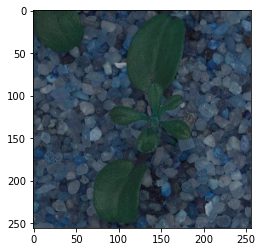

In [68]:
plt.imshow(X_new[0]);

# 3. Model training

**Checkpoint: Please make sure if shape of X is (No.of images, height, width, No. Of channels). If not, you need to correct it otherwise it will be issue during model training.**

## A. Split the data into train and test data.

In [69]:
# Import Library
from sklearn.model_selection import train_test_split

# Use stratify option to overcome class imbalance problem
X_train,X_test,y_train,y_test=train_test_split(X_new, train_label,test_size=0.2, random_state=13, 
                                               stratify=train_label)

print(f"Shapes of Train & Test sets are: {X_train.shape},{X_test.shape}")

print(f"Shapes of Train & Test sets of Target are: {y_train.shape},{y_test.shape}")

Shapes of Train & Test sets are: (3800, 256, 256, 3),(950, 256, 256, 3)
Shapes of Train & Test sets of Target are: (3800, 12),(950, 12)


## B. Create new CNN architecture to train the model.

In [74]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(256, 256, 3), activation='relu'))
#model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

#model.add(Dense(32, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))

model.add(Dense(12, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 252, 252, 64)      4864      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 126, 126, 64)      256       
_________________________________________________________________
dropout_13 (Dropout)         (None, 126, 126, 64)      0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1016064)           0         
_________________________________________________________________
dense_12 (Dense)             (None, 12)                12192780  
Total params: 12,197,900
Trainable params: 12,197,772
Non-trainable params: 128
________________________________________

## C. Train the model on train data and validate on test data.

In [75]:
#Specify Loss and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, 
                  y_train, 
                  epochs = 2, 
                  validation_data = (X_test,y_test),
                  batch_size = 32)

Train on 3800 samples, validate on 950 samples
Epoch 1/2
3800/3800 [==============================] - 473s 125ms/sample - loss: 4.5340 - acc: 0.1503 - val_loss: 2.5900 - val_acc: 0.1000
Epoch 2/2
3800/3800 [==============================] - 454s 120ms/sample - loss: 2.0599 - acc: 0.3084 - val_loss: 2.4311 - val_acc: 0.1232


In [76]:
# Test Accuracy
cnn_loss, cnn_accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', cnn_loss)
print('Test accuracy:', cnn_accuracy)

Test loss: 2.431067426079198
Test accuracy: 0.123157896


## D. Select a random image and print actual label and predicted label for the same. 

In [77]:
# Drop Unnecessary Column
#temp = train.drop(['Type of Image'], axis=1)

# Select 1 Random Image
temp = train.sample(1)

# Convert DataFrame to List
temp = temp.values.tolist()
    
# Select 1 Random Image for Prediction
for i, j, k in temp:
    print('Image Selected is: ',i)
    image_path = data_dir+i
    print('Image Path is: ',image_path)
    print('Type of Image is: ',j)
    print('Actual Image Name is: ',k)

Image Selected is:  train/Small-flowered Cranesbill/6c7043cc5.png
Image Path is:  /Users/rohan/Documents/AIML-CV Project/unzipped/plant-seedlings-classification/train/Small-flowered Cranesbill/6c7043cc5.png
Type of Image is:  10
Actual Image Name is:  Small-flowered Cranesbill


In [78]:
#select_image = data_dir+'train/Black-grass/5a1295fb4.png'

# Load the Image that has to be predicted
img_pred = cv2.imread(image_path)
img_pred_resize = cv2.resize(img_pred,(256,256),interpolation = cv2.INTER_CUBIC)
img_predict = np.expand_dims(img_pred_resize, axis=0)
print(f"The shape of image to be predicted is:'{img_pred.shape}'")
print(f"The shape of image to be predicted after expanding the dimensions is:'{img_predict.shape}'")

The shape of image to be predicted is:'(218, 218, 3)'
The shape of image to be predicted after expanding the dimensions is:'(1, 256, 256, 3)'


In [79]:
# Make Prediction with the best model
cnn_predict = np.argmax(model.predict(img_predict))

# Display prediction
print('The predicted flower is with label:', cnn_predict)
print("Actual Label is: ",j)

The predicted flower is with label: 10
Actual Label is:  10


# Part B

**DOMAIN:** Botanical Research

**CONTEXT:** University X is currently undergoing some research involving understanding the characteristics of flowers. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s species from a photo.

**DATA DESCRIPTION:** The dataset comprises of images from 17 plant species.

**PROJECT OBJECTIVE:** To experiment with various approaches to train an image classifier to predict type of flower from the image.

# Steps and tasks:

# 1. Import and Understand the data

## A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading.

**Hint: It can be imported from tflearn.datasets. 
If tflearn is not installed, install it.
It can be loaded using: x, y = oxflower17.load_data()**

In [8]:
# Import oxflower17 dataset
import tflearn.datasets.oxflower17 as oxflower17
X, Y = oxflower17.load_data()

Instructions for updating:
non-resource variables are not supported in the long term


In [9]:
# Save the dataset
#np.savez_compressed('oxflower17', X=X, Y=Y)

# Load the dataset
#data = np.load('oxflower17.npz')

## B. Print Number of images and shape of the images. 

In [10]:
print('Number of Images:',X.shape[0])
print('Shape of Images:',X.shape[1:])

Number of Images: 1360
Shape of Images: (224, 224, 3)


* There are 1360 images in the dataset.
* Shape of the images are given above.
* Each image is 224x224 with 3 channels.

## C. Print count of each class from y.

In [11]:
print("Total labels: {}".format(len(np.unique(Y))))
print("Labels: {}".format(Y))

Total labels: 17
Labels: [ 5 12 16 ...  6  6 10]


In [12]:
import collections
counter = collections.Counter(Y)
counter

Counter({5: 80,
         12: 80,
         16: 80,
         13: 80,
         6: 80,
         8: 80,
         11: 80,
         9: 80,
         3: 80,
         14: 80,
         15: 80,
         7: 80,
         10: 80,
         2: 80,
         0: 80,
         1: 80,
         4: 80})

* Each class has 80 count of occurrences. Thus the classes are balanced.

# 2. Image Exploration & Transformation [Learning purpose - Not related to final model] 

## A. Display 5 random images. 

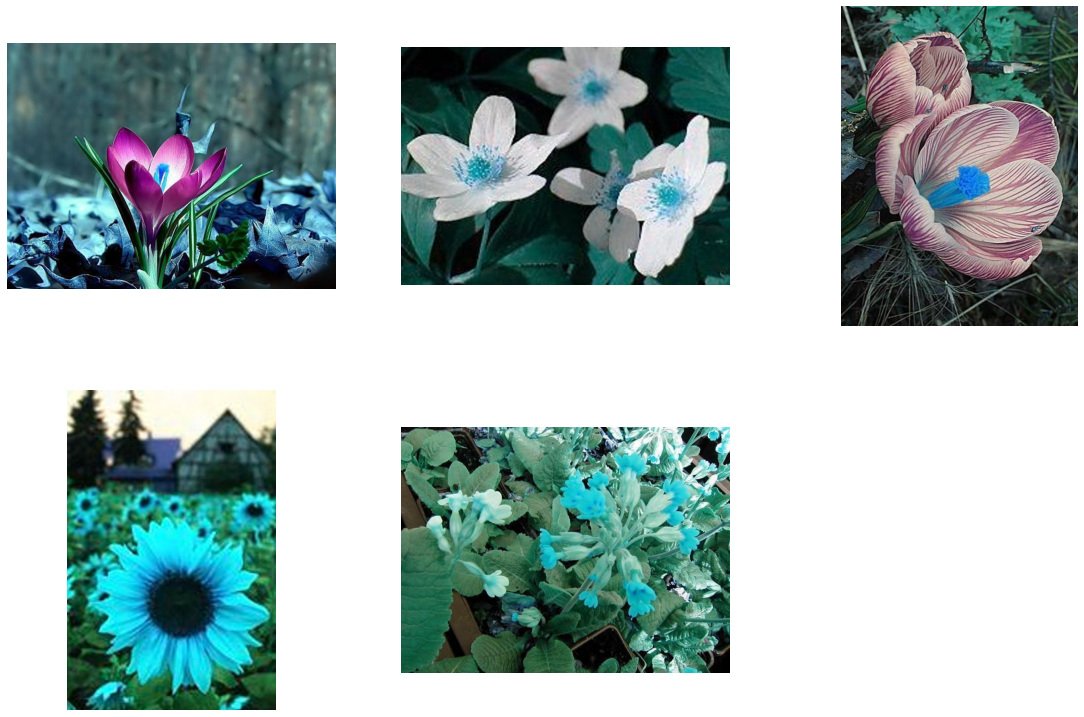

In [13]:
# Import random library
import random

multipleImages = glob('/Users/rohan/Documents/AIML-CV Project/17flowers/jpg/*/*.jpg')
def PlotRandomImages():
    r = random.sample(multipleImages, 5)
    plt.figure(figsize=(20,20))
    plt.subplot(331)
    plt.imshow(cv2.imread(r[0])); plt.axis('off')
    plt.subplot(332)
    plt.imshow(cv2.imread(r[1])); plt.axis('off')
    plt.subplot(333)
    plt.imshow(cv2.imread(r[2])); plt.axis('off')
    plt.subplot(334)
    plt.imshow(cv2.imread(r[3])); plt.axis('off')
    plt.subplot(335)
    plt.imshow(cv2.imread(r[4])); plt.axis('off')
    
PlotRandomImages()

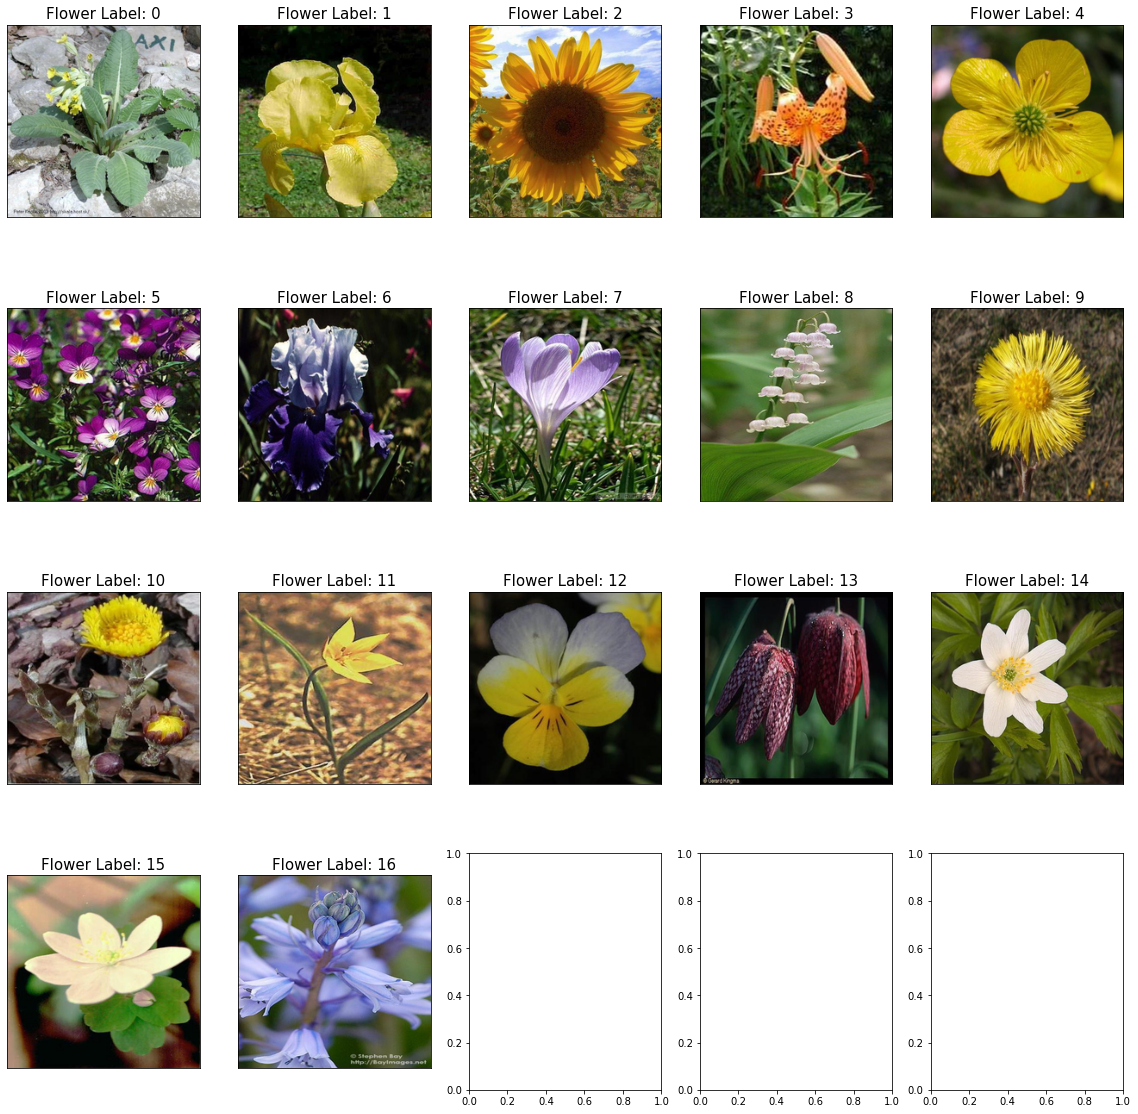

In [14]:
# Viewing a flower image from every species
cols = 5
rows = int(np.ceil(len(np.unique(Y))/cols))

fig, ax = plt.subplots(rows, cols, figsize=(20,20))
for i in np.unique(Y):
    col = i % 5
    row = int(i/5)
    
    ax[row][col].imshow(X[i])
    ax[row][col].tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    ax[row][col].set_title(f"Flower Label: {i}",{'fontsize':15})
plt.show() 

## B. Select any image from the dataset and assign it to a variable.

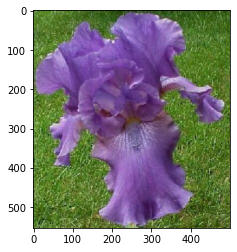

In [15]:
# Import Library
import skimage.io as io

# Read the image
img = io.imread('image_0417.jpg')

plt.imshow(img)
plt.show()

## C. Transform the image into grayscale format and display the same.

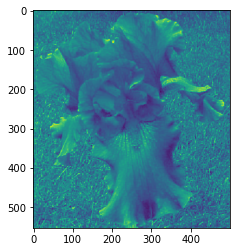

In [16]:
# Import Library
from skimage import color

# Convert Color image to Grayscale Format
imgGray = color.rgb2gray(img)

# Display Grayscale image
plt.imshow(imgGray)
plt.show()

## D. Apply a filter to sharpen the image and display the image before and after sharpening.

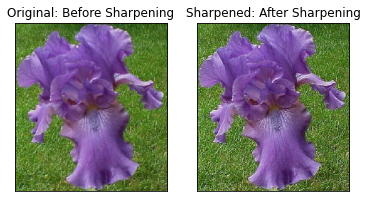

In [17]:
import cv2

# Sharpen the image
# Define Kernel for sharpening
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

# Create Filter to Sharpen
sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

# Display Images
plt.subplot(121),plt.imshow(img),plt.title('Original: Before Sharpening')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sharp),plt.title('Sharpened: After Sharpening')
plt.xticks([]), plt.yticks([])
plt.show()

## E. Apply a filter to blur the image and display the image before and after blur.

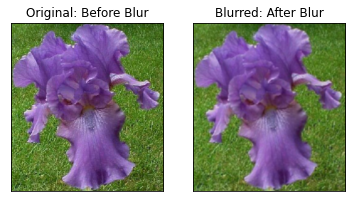

In [18]:
# Create Filter to Blur
blur = cv2.blur(img,(5,5))

# Display Images
plt.subplot(121),plt.imshow(img),plt.title('Original: Before Blur')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred: After Blur')
plt.xticks([]), plt.yticks([])
plt.show()

## F. Display all the 4 images from above questions besides each other to observe the difference.

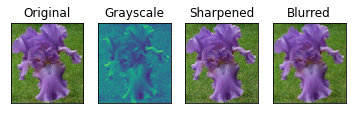

In [19]:
# Plot original image
plt.subplot(141),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

# Plot grayscale image
plt.subplot(142),plt.imshow(imgGray),plt.title('Grayscale')
plt.xticks([]), plt.yticks([])

# Plot sharpened image
plt.subplot(143),plt.imshow(sharp),plt.title('Sharpened')
plt.xticks([]), plt.yticks([])

# Plot blurred image
plt.subplot(144),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# 3. Model training and Tuning:

## A. Split the data into train and test with 80:20 proportion.

In [20]:
# Import Library
from sklearn.model_selection import train_test_split

#Splitting data into training and testing set
#training set : 80%
#testing set: 20%

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

print(f"Shapes of Train & Test sets are: {X_train.shape},{X_test.shape}")

print(f"Shapes of Train & Test sets of Target are: {y_train.shape},{y_test.shape}")

Shapes of Train & Test sets are: (1088, 224, 224, 3),(272, 224, 224, 3)
Shapes of Train & Test sets of Target are: (1088,),(272,)


## B. Train a model using any Supervised Learning algorithm and share performance metrics on test data. 

In [21]:
# Import Required Libraries for Supervised Learning
from tensorflow import keras
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import cv2

# Perform Normalization
x_train = X_train/255.0
x_test = X_test/255.0

# Reshaping to 2D Array for Supervised Learning
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))
x_train2

array([[5.6901196e-04, 7.5355632e-04, 3.9984621e-04, ..., 3.1218762e-03,
        2.1222609e-03, 1.5993848e-03],
       [1.9377163e-03, 2.4298348e-03, 3.2449057e-03, ..., 1.3994618e-03,
        2.1376396e-03, 9.6885813e-04],
       [8.6120726e-04, 6.1514805e-04, 3.8446751e-04, ..., 3.0757402e-04,
        4.7673972e-04, 3.5371011e-04],
       ...,
       [1.5378702e-05, 3.0757402e-04, 1.6916571e-04, ..., 2.7835448e-03,
        2.6143792e-03, 2.7220300e-03],
       [1.1226452e-03, 1.3840831e-03, 7.0742023e-04, ..., 6.3052675e-04,
        8.7658595e-04, 3.0757402e-04],
       [2.1068822e-03, 1.8608228e-03, 1.6301422e-03, ..., 1.3994618e-03,
        1.1226452e-03, 1.1072665e-03]], dtype=float32)

In [22]:
# Reshaping test set
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))
x_test2

array([[2.2452904e-03, 2.3836987e-03, 1.6916571e-03, ..., 1.9069589e-03,
        2.2760478e-03, 1.0765091e-03],
       [0.0000000e+00, 1.5378702e-05, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3840831e-03, 1.1995387e-03, 1.3533257e-03, ..., 1.0149943e-03,
        6.4590544e-04, 5.8439065e-04],
       ...,
       [1.5378702e-05, 9.2272203e-05, 0.0000000e+00, ..., 8.4582856e-04,
        1.3533257e-03, 2.9219533e-04],
       [1.8915802e-03, 2.1068822e-03, 1.5993848e-03, ..., 1.2302962e-04,
        9.2272203e-05, 2.6143793e-04],
       [1.8300654e-03, 2.0761248e-03, 1.7377932e-03, ..., 1.5378700e-03,
        1.6147635e-03, 8.7658595e-04]], dtype=float32)

In [23]:
# Import Random Forest Classifier library
from sklearn.ensemble import RandomForestClassifier

# Create RFC class instance
rfc=RandomForestClassifier(n_jobs=-1, random_state=1)

# Train the model
rfc.fit(x_train2,y_train)

# Training Accuracy
rfc.score(x_train2,y_train)

1.0

In [24]:
# Make predictions
rfc_pred = rfc.predict(x_test2)

# Test Accuracy
rfc.score(x_test2, y_test)

0.5110294117647058

In [25]:
# Classification report
print(classification_report(rfc_pred,y_test))

              precision    recall  f1-score   support

           0       0.40      0.73      0.52        11
           1       0.26      0.45      0.33        11
           2       0.75      0.71      0.73        17
           3       0.30      0.60      0.40        10
           4       0.63      0.75      0.69        16
           5       0.30      0.14      0.19        22
           6       0.82      0.53      0.64        17
           7       0.68      0.71      0.70        21
           8       0.62      0.62      0.62        13
           9       0.45      0.23      0.30        22
          10       0.32      0.47      0.38        15
          11       0.42      0.40      0.41        20
          12       0.64      0.56      0.60        16
          13       0.50      0.64      0.56        11
          14       0.21      0.30      0.25        10
          15       0.64      0.45      0.53        20
          16       0.93      0.65      0.76        20

    accuracy              

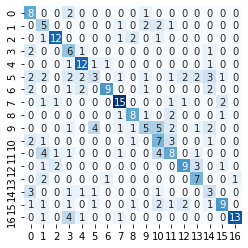

In [26]:
# Confusion Matrix
sns.heatmap(confusion_matrix(rfc_pred,y_test), square=True, annot=True, cmap='Blues', fmt='d', cbar=False);

## C. Train a model using Neural Network and share performance metrics on test data.

In [27]:
# Convert target variable
# Import Library
from sklearn.preprocessing import LabelBinarizer

# Create class for encoding
enc = LabelBinarizer()

# Fit & Transform the training target variable
y_train2 = enc.fit_transform(y_train)

# Display the newly encoded target class of training variable
y_train2[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [28]:
# Fit & Transform the test target variable
y_test2 = enc.transform(y_test)

# Display the newly encoded target class of training variable
y_test2[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [29]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Import Relevant Libraries
import itertools
import tensorflow
from tensorflow.python.keras.layers import Dense, Dropout, InputLayer, BatchNormalization, Flatten
from tensorflow.python.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPool2D, GlobalMaxPool2D
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Create NN Model

def nn_model(height, width, num_channels, num_classes, loss='categorical_crossentropy', metrics=['accuracy']):
    model = Sequential()
    model.add(InputLayer(input_shape=(height, width, num_channels)))
    
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(BatchNormalization())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(BatchNormalization())
    model.add(Dense(num_classes, activation = "softmax"))
    opt = tensorflow.keras.optimizers.Adam(lr=0.000001)
    model.compile(optimizer = opt, loss = loss, metrics = metrics)
    
    model.summary()
    return model

nn = nn_model(224,224,3,17)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150528)            602112    
_________________________________________________________________
dense (Dense)                (None, 1024)              154141696 
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [30]:
history = nn.fit(X_train, 
                  y_train2, 
                  epochs = 10, 
                  validation_data = (X_test,y_test2),
                  batch_size = 32)

Train on 1088 samples, validate on 272 samples
Epoch 1/10
1088/1088 [==============================] - 73s 67ms/sample - loss: 3.4947 - acc: 0.0818 - val_loss: 2.7790 - val_acc: 0.0846
Epoch 2/10
1088/1088 [==============================] - 65s 60ms/sample - loss: 2.9955 - acc: 0.1489 - val_loss: 2.6552 - val_acc: 0.1838
Epoch 3/10
1088/1088 [==============================] - 57s 53ms/sample - loss: 2.7739 - acc: 0.1866 - val_loss: 2.5793 - val_acc: 0.2169
Epoch 4/10
1088/1088 [==============================] - 70s 64ms/sample - loss: 2.4853 - acc: 0.2463 - val_loss: 2.4882 - val_acc: 0.2904
Epoch 5/10
1088/1088 [==============================] - 56s 51ms/sample - loss: 2.2759 - acc: 0.3024 - val_loss: 2.4118 - val_acc: 0.3162
Epoch 6/10
1088/1088 [==============================] - 55s 50ms/sample - loss: 2.1209 - acc: 0.3539 - val_loss: 2.3285 - val_acc: 0.3309
Epoch 7/10
1088/1088 [==============================] - 52s 48ms/sample - loss: 1.9500 - acc: 0.3869 - val_loss: 2.2459 - val

In [31]:
nn_loss, nn_accuracy = nn.evaluate(X_test, y_test2, verbose=1)
print('Test loss:', nn_loss)
print('Test accuracy:', nn_accuracy)

Test loss: 2.0844608475180233
Test accuracy: 0.375


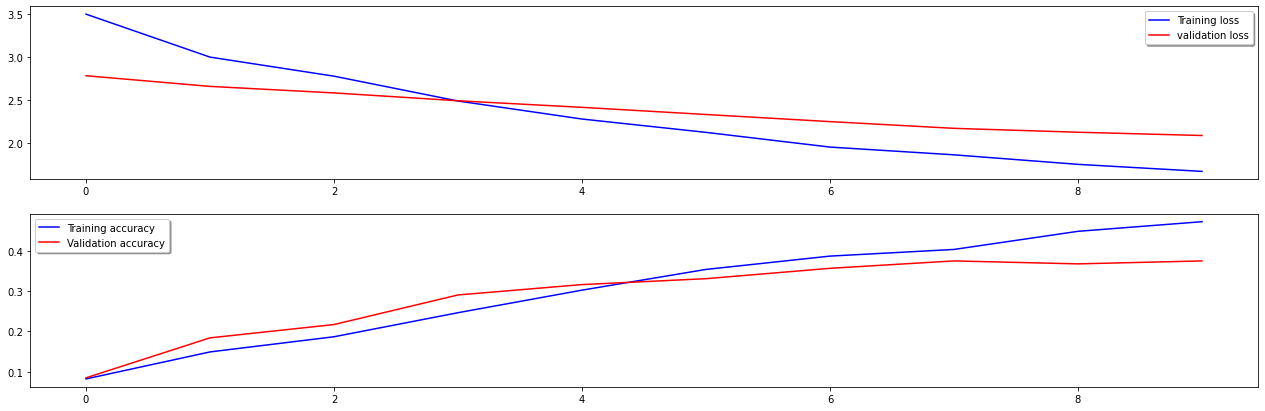

In [32]:
# Model Evaluation Plots
fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [33]:
# Make predictions
nn_pred = nn.predict(X_test)

# Convert predictions classes to one hot vectors 
nn_pred_classes = np.argmax(nn_pred,axis = 1) 

# Convert test observations to one hot vectors
Y_test = np.argmax(y_test2,axis = 1) 

# Classification report
print(classification_report(nn_pred_classes,Y_test))

              precision    recall  f1-score   support

           0       0.05      0.25      0.08         4
           1       0.26      0.21      0.23        24
           2       0.50      0.89      0.64         9
           3       0.20      0.67      0.31         6
           4       0.68      0.50      0.58        26
           5       0.10      0.08      0.09        12
           6       0.64      0.23      0.33        31
           7       0.64      0.33      0.44        42
           8       0.46      0.46      0.46        13
           9       0.18      0.29      0.22         7
          10       0.36      0.23      0.28        35
          11       0.11      0.29      0.15         7
          12       0.50      0.70      0.58        10
          13       0.29      0.44      0.35         9
          14       0.07      0.33      0.12         3
          15       0.43      0.38      0.40        16
          16       0.93      0.72      0.81        18

    accuracy              

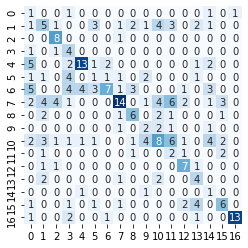

In [34]:
# Confusion Matrix
sns.heatmap(confusion_matrix(nn_pred_classes,Y_test), square=True, annot=True, cmap='Blues', fmt='d', cbar=False);

## D. Train a model using a basic CNN and share performance metrics on test data. 

In [35]:
# Import Libraries
from tensorflow.keras.models import Sequential  # initial NN
from tensorflow.keras.layers import Dense, Dropout # construct each layer
from tensorflow.keras.layers import Conv2D # swipe across the image by 1
from tensorflow.keras.layers import MaxPooling2D # swipe across by pool size
from tensorflow.keras.layers import Flatten, GlobalAveragePooling2D

# Define Model
model = Sequential()

model.add(Conv2D(32, (5,5), activation ='relu', padding='same', input_shape = (224,224,3))) 
#model.add(Conv2D(filters = 32, kernel_size = (5,5),activation ='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
#model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
#model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten()) 
# fully connected layer 
model.add(Dense(units = 500, activation = 'relu')) 
model.add(Dropout(0.8))
# output layer
model.add(Dense(units = 17, activation = 'softmax'))

from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=0.01)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"]) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)      

In [36]:
history = model.fit(X_train, 
                  y_train2, 
                  epochs = 3, 
                  validation_data = (X_test,y_test2),
                  batch_size = 32)

Train on 1088 samples, validate on 272 samples
Epoch 1/3
1088/1088 [==============================] - 120s 111ms/sample - loss: 10.1765 - acc: 0.0625 - val_loss: 2.8449 - val_acc: 0.0368
Epoch 2/3
1088/1088 [==============================] - 115s 106ms/sample - loss: 2.8424 - acc: 0.0469 - val_loss: 2.8434 - val_acc: 0.0515
Epoch 3/3
1088/1088 [==============================] - 109s 100ms/sample - loss: 2.8385 - acc: 0.0588 - val_loss: 2.8452 - val_acc: 0.0404


In [37]:
cnn_loss, cnn_accuracy = model.evaluate(X_test, y_test2, verbose=1)
print('Test loss:', cnn_loss)
print('Test accuracy:', cnn_accuracy)

Test loss: 2.8451765565311207
Test accuracy: 0.040441178


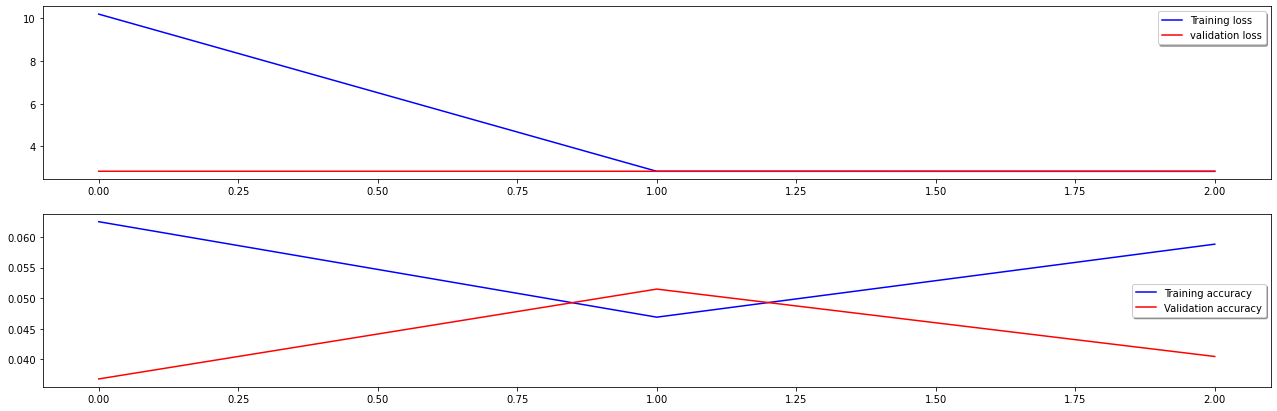

In [38]:
# Model Evaluation Plots
fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [39]:
# Make predictions
cnn_pred = model.predict(X_test)

# Convert predictions classes to one hot vectors 
cnn_pred_classes = np.argmax(cnn_pred,axis = 1) 

# Convert test observations to one hot vectors
Y_test = np.argmax(y_test2,axis = 1) 

# Classification report
print(classification_report(cnn_pred_classes,Y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       1.00      0.04      0.08       272
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0

    accuracy              

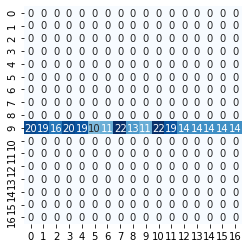

In [40]:
# Confusion Matrix
sns.heatmap(confusion_matrix(cnn_pred_classes,Y_test), square=True, annot=True, cmap='Blues', fmt='d', cbar=False);

* CNN network is the poorest among the three. Let's use transfer learning and see if accuracies can be improved.

In [41]:
# CNN model with VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras import optimizers

model_type = 'vgg16'

# Loading the VGG Model

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [42]:
# Freeze base model to stop updating any weights
vgg_model.trainable = False

# Define Model on top of VGG16
import tensorflow as tf
vgg16 = tf.keras.Sequential([vgg_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(17, activation="softmax")                                     
                                ])

# Compile Model
base_learning_rate = 0.00001
vgg16.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model Summary
vgg16.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 17)                8721      
Total params: 14,723,409
Trainable params: 8,721
Non-trainable params: 14,714,688
_________________________________________________________________


In [43]:
# Train the model
history = vgg16.fit(X_train,y_train2,epochs = 1, validation_data = (X_test,y_test2))

Train on 1088 samples, validate on 272 samples
1088/1088 [==============================] - 479s 440ms/sample - loss: 0.8314 - acc: 0.9412 - val_loss: 0.8064 - val_acc: 0.9412


In [44]:
# Test Accuracy
cnn_loss, cnn_accuracy = vgg16.evaluate(X_test, y_test2, verbose=1)
print('Test loss:', cnn_loss)
print('Test accuracy:', cnn_accuracy)

Test loss: 0.8063575099496281
Test accuracy: 0.9411765


* With just one epoch over VGG16 using transfer learning, the accuracies have improved significantly.
* Thus VGG16 is the best model.

## E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label.

In [46]:
# Load the Image that has to be predicted
img_pred = cv2.imread('Prediction.jpg')
img_pred_resize = cv2.resize(img_pred,(224,224),interpolation = cv2.INTER_CUBIC)
#cv2_imshow(img_pred_resize)
img_predict = np.expand_dims(img_pred_resize, axis=0)
print(f"The shape of image to be predicted is:'{img_pred.shape}'")
print(f"The shape of image to be predicted after expanding the dimensions is:'{img_predict.shape}'")

The shape of image to be predicted is:'(224, 224, 3)'
The shape of image to be predicted after expanding the dimensions is:'(1, 224, 224, 3)'


In [47]:
# Make Prediction with the best model
cnn_predict_tl = np.argmax(vgg16.predict(img_predict))

# Display prediction
print('The predicted flower is with label:', cnn_predict_tl)

# Save the model
#vgg16.save("CNN_with_VGG16.h5")

The predicted flower is with label: 15
